<center>
    <h1 style="color: navy; background-color: lightgrey; padding: 10px; border-radius: 10px;">
        Building Transformer from Scratch in PyTorch
    </h1>
</center>

<font color="darkslateblue" size=+2.5><b>Introduction</b></font>

Natural Language Processing (NLP) is like teaching computers to understand and talk like humans. It's a part of technology that has really changed to improvements in Machine Learning and Artificial Intelligence. The journey of NLP began in the 1950s with rule-based approaches and gradually evolved through the decades, with the 1990s marking a shift towards statistical methods. The 2000s saw the rise of machine learning, leading to significant advances in applications like speech recognition and machine translation.

But one of the biggest game-changers in NLP came in the late 2010s with the introduction of Transformers, as presented in the paper "Attention Is All You Need" by Vaswani et al. These are special tools that help computers understand language even better, using deep learning techniques to process of text data. Transformers represent a significant shift in how computers understand and process human language, revolutionizing the traditional NLP approaches.

Think of Transformers as super-smart helpers that make NLP do amazing things like:
* Text Summarization : This tool simplifies lengthy articles by providing a short summaries that include only the most critical information and main points.
* Sentiment Analysis : It enables the analysis of written text to determine whether the words express happiness, sadness, or neutrality. Businesses find this tool invaluable as it helps them gauge customer sentiments towards their products or services, like having a "mood meter" for customer feedback.
* Recommender Systems : These systems offer personalized suggestions based on users' previous preferences, akin to having a custom list of recommendations for movies, music, or other items that align with individual tastes.
* Language Translation : This tool translates words from one language to another, facilitating communication between people who speak different languages.
* Question Answering : Similar to asking a knowledgeable friend, this tool allows users to pose questions to a computer, which then provides answers.
* Speech Recognition : This technology listens to spoken words and transcribes them efficiently, functioning like a super-fast typist capturing everything said.

Transformers have really made a big difference in how computers understand and use human language, making them more helpful in our daily lives. Their introduction marked a new era in NLP, leading to more sophisticated, efficient, and versatile language models that continue to push the boundaries of what's possible in human-computer interaction.

<font color="darkslateblue" size=+2.5><b>Transformers Architecture</b></font>

Let's go back in time to the paper "Attention Is All You Need" from 2017. This paper introduced something really cool: the Transformer architecture. It's a game-changing deep learning model that reshaped the landscape of Natural Language Processing (NLP) and made a significant impact on other areas of machine learning. It has become the foundation for developing advanced NLP models. In this article, we're going to explore how to implement a Transformer model. While we won't dive deeply into the theoretical aspects of Transformers here (you can check out Jay Alammar's blog for a thorough explanation). we'll focus on the practical side. We'll guide you through building a Transformer model in PyTorch, from the embedding layer to the multi-head attention mechanism.

</div><div align="center">
  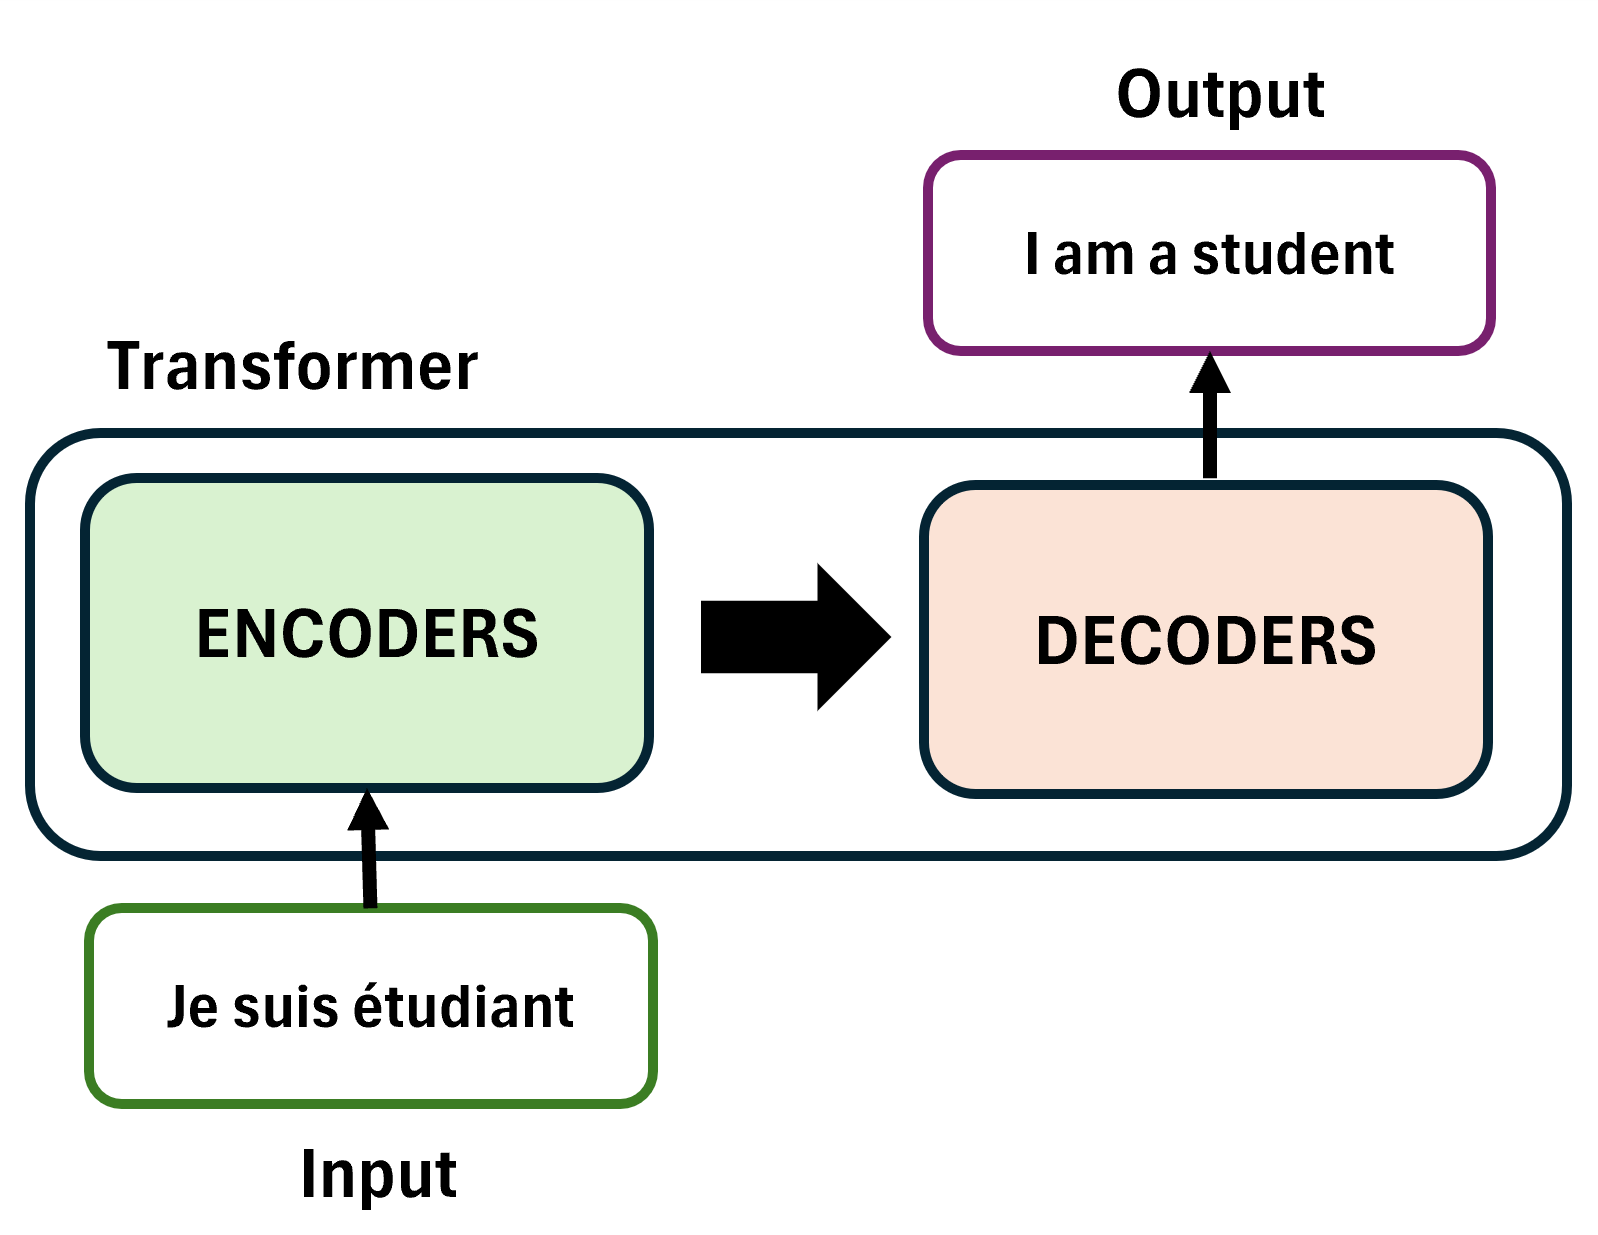<p style="text-align: center; font-weight: bold;">Figure 1: High-Level Components of the Transformer Model</p>
</div>

The Transformer model is built around two key parts: the Encoder and the Decoder. Think of them like specialized teams collaborating on a task. The Encoder focuses on understanding the input data, breaking it down, and creating a meaningful representation. This representation is then passed to the Decoder, which takes this knowledge and transforms it into the desired output. Imagine the Encoder as the 'comprehension' team and the Decoder as the 'generation' team. They work together in a step-by-step fashion, each layer in both Encoder and Decoder contributing to the refinement and transformation of information, ensuring the model understands and generates accurate outputs. Figure 1 represents a machine translation model from French to English, where both the Encoder and Decoder can be stacked on top of each other. 

</div><div align="center">
  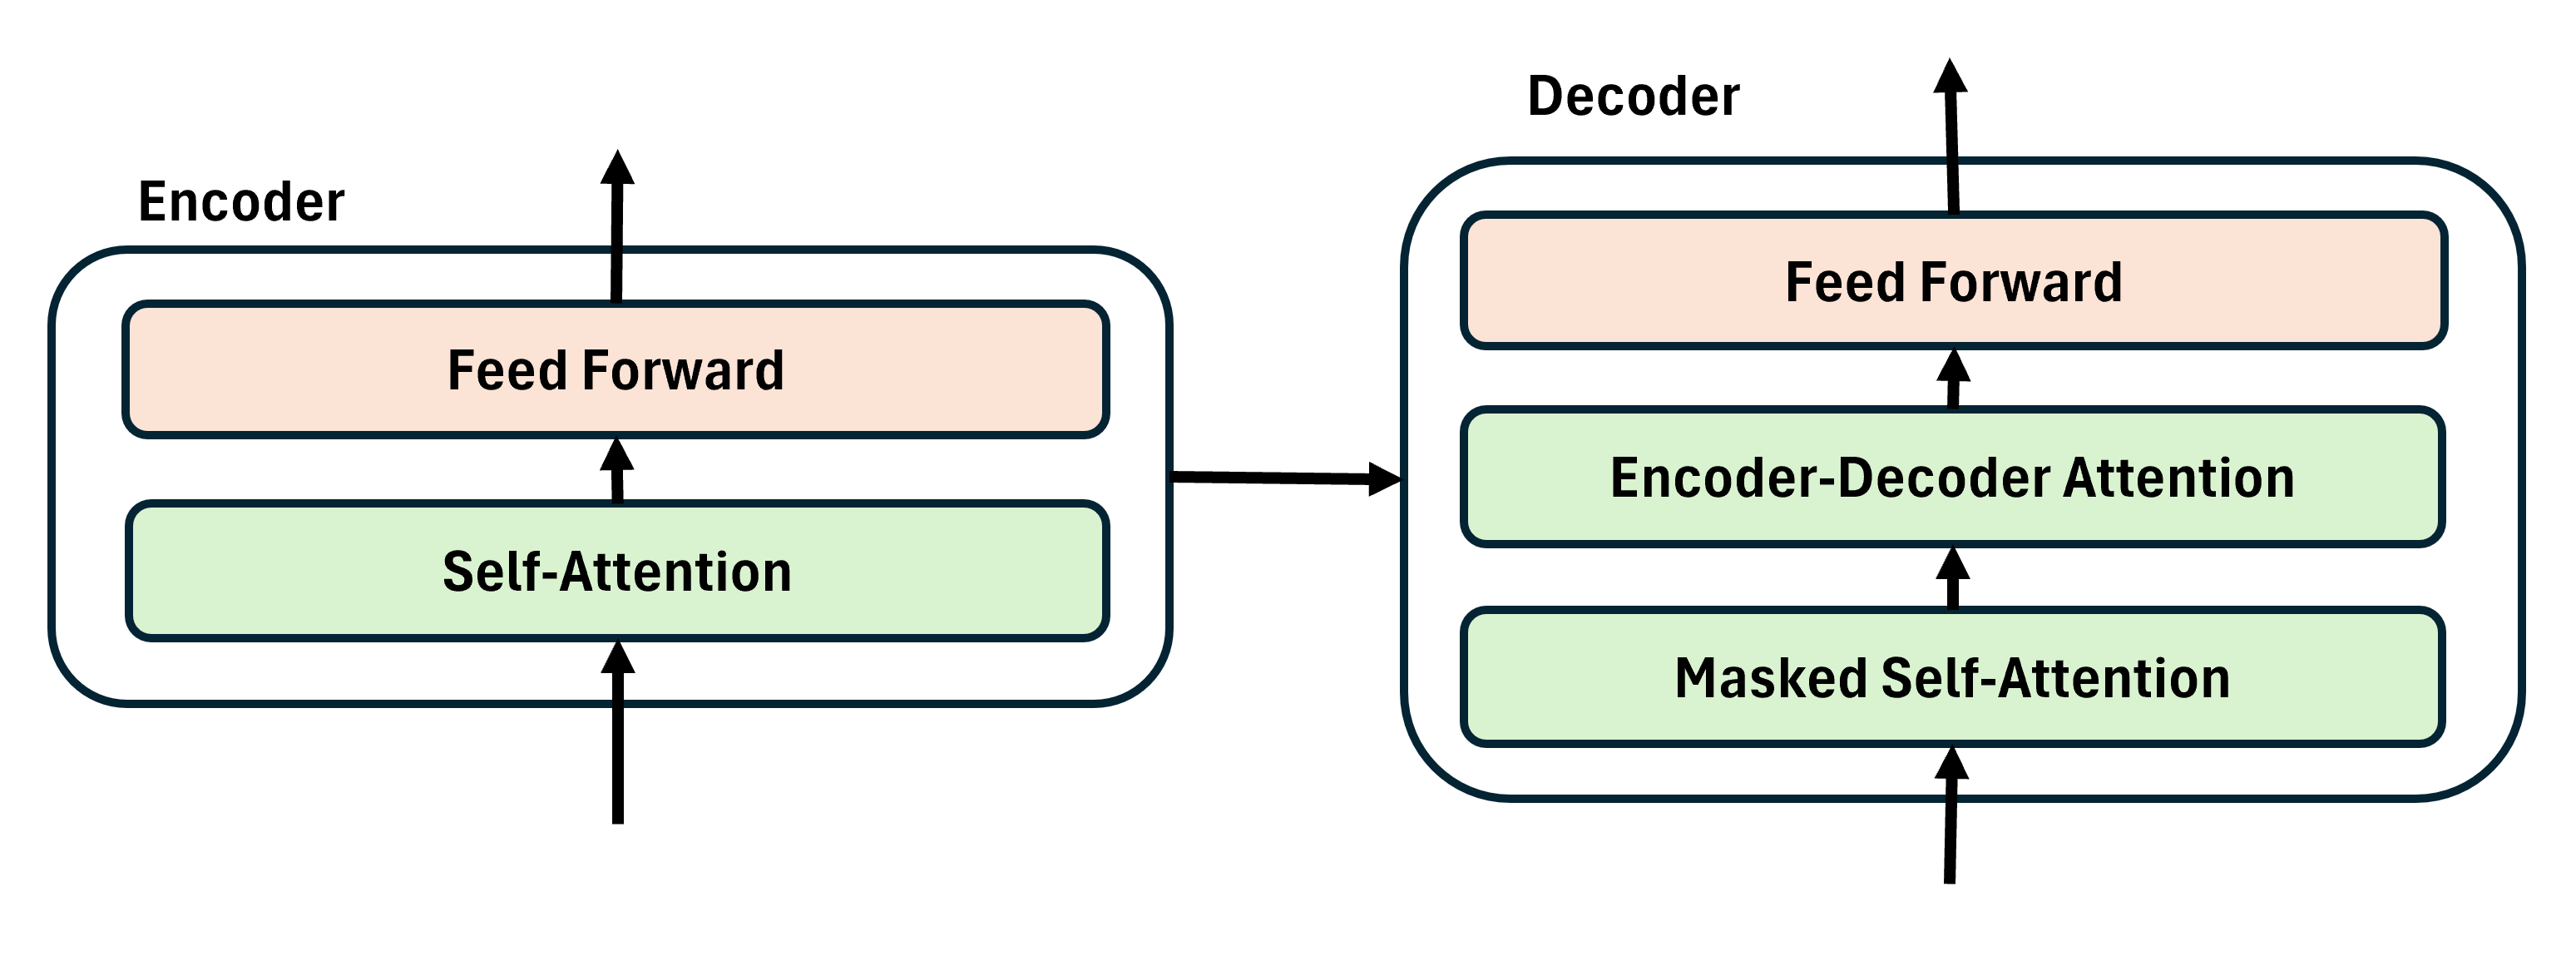<p style="text-align: center; font-weight: bold;">Figure 2: Encoder-Decoder Architecture</p>
</div>

Now let's break down the components of the Encoder and Decoder in the Transformer model :Now let's break down the components of the Encoder and Decoder in the Transformer model :

1. Encoder: It consists of several identical layers, with each layer having two main parts:
- The Self-Attention Mechanism : This allows the model to weight the importance of different words in the input sentence differently, capturing deep word relationships.
- The Feedforward Neural Network : It processes the insights from self-attention, enhancing the model's understanding of complex data patterns.
- The outputs from each layer are passed on to the next, building a layered representation of the input that understands both the immediate and broader context of words.

2. Decoder: It mirrors the Encoder's structure but adds a crucial feature to prevent future information leakage during training :
- Masked Self-Attention Mechanism is designed to prevent the model from attending to future tokens during training. It ensures that each word is aware only of preceding words, facilitating autoregressive generation and preventing information leakage from the future.
- Encoder-Decoder Attention Mechanism allows the Decoder to attend to the output of the Encoder. By focusing on relevant parts of the input sequence, the Decoder can effectively generate output that takes into account the relationships learned by the Encoder.
- After passing through these sub-layers, the Decoder's output undergoes processing by a feedforward neural network. The final layer produces the model's output, representing the predicted sequence based on the learned context and dependencies captured throughout the network.

</div><div align="center">
  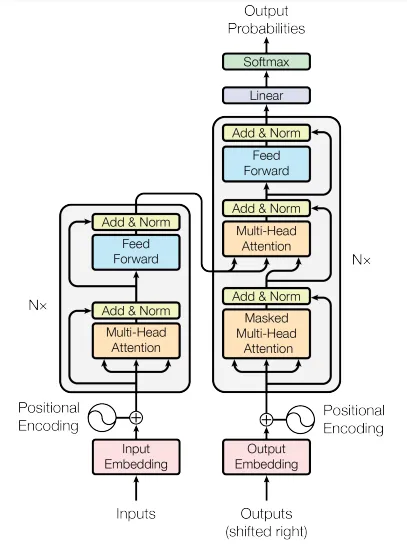<p style="text-align: center; font-weight: bold;">Figure 3: Transformers Architecture</p>
</div>

Figure 3 illustrates the comprehensive architecture of the Transformers' attention model that we aim to construct in this article.

- *Encoder-Decoder Architecture*: Transformers are commonly used in a dual-architecture setup consisting of an encoder and a decoder. In machine translation, for example, the encoder processes the source language, and the decoder generates the target language. The encoder and decoder are composed of layers of self-attention and feedforward neural networks.

- *Layer Normalization*: Layer normalization is applied after each sublayer in the Transformer, helping stabilize training and improve the model's generalization.

- *Scaled Dot-Product Attention*: This is the mathematical foundation of the self-attention mechanism, efficiently calculating attention scores between elements in the sequence.

The Transformer's architectural innovations, particularly its parallel processing capabilities, bidirectional context understanding, and attention mechanisms, have led to significant improvements in both model training efficiency and performance on a wide range of NLP tasks. Transformers have revolutionized natural language processing and are the backbone of various state-of-the-art models like BERT, GPT, and T5. In this article, we'll embark on a journey to build a simplified version of the Transformer's attention mechanism from scratch. Buckle up, and let's dive into the fascinating world of attention!.

<font color="darkslateblue" size=+2.5><b>Import Library</b></font>

Before diving into the construction of a Transformer model with PyTorch, it's crucial to equip ourselves with the right set of tools. This part of our guide will cover the foundational libraries required to bring our Transformer to life:

1. **`torch`**: This is the main PyTorch library. It's like the engine that powers our deep learning model. With PyTorch, we can easily create, train, and work with neural networks.
2. **`torch.nn`**: This part of PyTorch is specifically for building neural networks. We'll use it to create different components of our Transformer, like layers and embeddings.
3. **`torch.nn.functional as F`**: This is another part of PyTorch that contains functions commonly used in deep learning, such as activation functions. We'll use it for various operations on our data.
4. **`math`**: Just the standard Python math library. We'll use it for basic mathematical operations within our Transformer.
5. **`matplotlib.pyplot as plt`**: This library helps us visualize things. We might use it to create charts or graphs to better understand how our Transformer is performing during development.

In simple terms, these libraries give us the tools to create, train, and understand our Transformer model in PyTorch. They're like the building blocks that we'll use to construct our deep learning architecture.


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import matplotlib.pyplot as plt

<font color="darkslateblue" size=+2.5><b>Word Embedding</b></font>


Word embedding is the process of converting words into a numerical representation, providing a way for computers to comprehend and work with language. Each word is assigned a unique code, enabling computers to understand the meaning and relationships between words. For instance, words like "King" and "Queen" receive distinct numerical codes because they convey different meanings, while similar words are assigned similar codes.

</div><div align="center">
  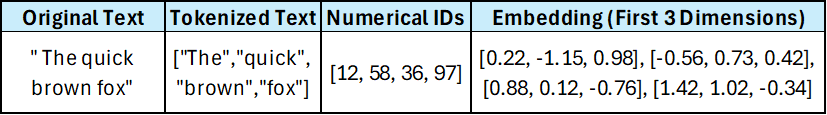
  <p style="text-align: center; font-weight: bold;">Figure 4: Word Embedding</p>
</div>

In Figure 4, the explanation follows:
- Original Text: is the sentence "The quick brown fox."
- Tokenized Text: Breaks down the sentence into individual words: ["The", "quick", "brown", "fox"].
- Numerical IDs: Each word is represented by a unique numerical code (hypothetical values: [12, 58, 36, 97]).
- Embedding (First 3 Dimensions): Displays the word embeddings for each word in the sentence, showcasing the first three dimensions of the hypothetical vector space. These values capture the semantic meaning and relationships of each word within those dimensions.
    - "The": [0.22, -1.15, 0.98]
    - "quick": [-0.56, 0.73, 0.42]
    - "brown": [0.88, 0.12, -0.76]
    

In [2]:
class Embedding(nn.Module):
    def __init__(self, vocab_size, embed_size):
        """
        Initialize the Embedding layer.

        Parameters:
        - vocab_size (int): The size of the vocabulary, i.e., the total number of unique tokens.
        - embed_dim (int): The dimensionality of the embedding vectors.
        """
        super(Embedding, self).__init__()
        # The embedding layer converts input tokens (word indices) into dense vectors.
        # It helps the model represent and understand the semantic meaning of words.
        self.embedding = nn.Embedding(vocab_size, embed_size)

    def forward(self, x):
        """
        Forward pass of the Embedding layer.

        Parameters:
        - x (torch.Tensor): Input tensor containing token indices.

        Returns:
        - torch.Tensor: Output tensor with embedded representations of input tokens.
        """
        # Input token indices are embedded to create dense vectors.
        embedded_output = self.embedding(x)
        
        return embedded_output

The code we're discussing sets up an `Embedding` module, which is a special tool used in neural networks to turn lists of numbers representing words (we call these "token indices") into rich, detailed vectors (or lists of numbers) that capture the essence of what these words mean. This step is super important because it helps the neural network understand the similarities and differences between words, making it much better at dealing with language.

In its initialization, the `Embedding` class requires two parameters: how many different words (or "tokens") it might see (`vocab_size`) and how detailed you want the vector representations to be (`embed_size`). Think of `vocab_size` as the number of words in a dictionary the embedding has to know about, and `embed_size` as how deeply you want to describe each word's meaning.

Within the class, the `Embedding` module is employed to establish the embedding layer. This layer acts as a vital link between the discrete world of individual words and the continuous space where neural networks operate. During the forward pass, the `forward` method takes input token indices (`x`) and transforms them into dense vectors using the embedding layer.


<font color="darkslateblue" size=+2.5><b>Positional Encoding</b></font>

In the Transformers, unlike traditional models such as RNNs and LSTMs, it doesn't naturally grasp the order or the sequence of words in a sentence. Traditional models process words one after another, but transformers handle all words at once and might lose track of their order. To overcome this limitation, Transformers employ the `PositionalEncoding` module in the provided code, helping understand the order of words in a sentence. These positional encodings are added to the input embeddings to help the model understand the order of words or tokens. In other words, it's about keeping track of the word order.

Imagine the sentence "The quick brown fox." Traditional models inherently understand the word order as words follow one another. However, the Transformer treats words as an unordered collection. To address this, positional encodings are introduced. They are like unique codes added to each word to indicate its position in the sentence. For example, "The" gets a code for being the first word, and "quick" gets one for being the second. By combining word embeddings and positional encodings, the Transformer can recognize not just word meanings but also their positions, enabling it to process text effectively, as illustrated in Figure 5.


The positional encoding used in the Transformer model, as introduced by Vaswani et al., is computed using the following equations:

<div style="background-color: white; text-align: center;">
  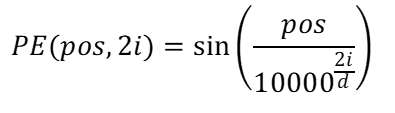
</div>

<div style="background-color: white; text-align: center;">
  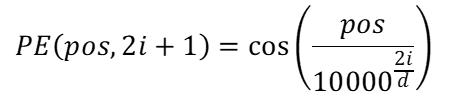
</div>

- PE(pos, 2i) represents the value in the positional encoding matrix at position (pos, 2i).
- PE(pos, 2i+1) represents the value in the positional encoding matrix at position (pos, 2i+1).
- "sine" and "cosine" are the sine and cosine functions.
- pos/10000^(2i/d) is the argument of the sine and cosine functions, where pos is the position, i is the dimension index, and d is the dimensionality of the input embeddings.

This formulation creates a positional encoding matrix containing sinusoidal and cosinusoidal values, capturing positional information to be added to the input embeddings. The frequency and phase of these functions allow the model to learn the sequential order of tokens in the input sequence.


Here is the implementation of the equation in the code below:

In [3]:
class PositionalEncoding(nn.Module):
    """
    This module implements positional encoding for transformer models.

    Positional encoding is used to inject information about the position of tokens
    into the input embeddings. This allows the model to take into account the
    sequential order of tokens in the input.

    Args:
        embed_size (int): The dimensionality of the input embeddings.
        max_len (int, optional): The maximum length of the input sequence.
            Defaults to 5000.

    Attributes:
        pe (torch.Tensor): The positional encoding matrix of shape `(max_len, embed_size)`.

    """

    def __init__(self, embed_size, max_len=5000):
        """
        Initializes the PositionalEncoding module.

        Args:
            embed_size (int): The dimensionality of the input embeddings.
            max_len (int, optional): The maximum length of the input sequence.
                Defaults to 5000.
        """
        super(PositionalEncoding, self).__init__()
        self.embed_dim = embed_size
        
        # Initialize the positional encoding matrix with zeros.
        pe = torch.zeros(max_len, embed_size)
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, embed_size, 2).float() * -(math.log(10000.0) / embed_size))
        
        # Apply the sine and cosine functions to the positional encoding matrix.
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        
        # Add a batch dimension to the positional encoding matrix.
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        """
        Forward pass of the PositionalEncoding module.

        Args:
            x (torch.Tensor): The input tensor of shape `(seq_len, batch_size, embed_size)`.

        Returns:
            torch.Tensor: The tensor with positional encoding added, of shape `(seq_len, batch_size, embed_size)`.
        """
        # Make embeddings relatively larger
        x = x * math.sqrt(self.embed_dim)
        # Add constant to embedding
        seq_len = x.size(1)
        # Add positional encoding to the input tensor.
        x = x + torch.autograd.Variable(self.pe[:,:seq_len], requires_grad=False)
        return x

When setting up this module, you need to specify two things: the size of the embeddings (`embed_size`) and the maximum sequence length you expect (`max_len`, which is optional and defaults to 5000). This setup ensures that the model can handle sentences up to 5000 words long, which is more than enough for most applications.

The magic happens when the module creates a special matrix (`pe`) filled with values derived from sine and cosine functions. These values vary depending on each word's position in the sentence, providing a smooth gradient of positional information that the model can use to discern the sequence of words. The beauty of using sine and cosine is that their patterns are easily distinguishable by the model, yet they repeat in a way that allows the model to understand long-range relationships between words.

During the forward pass, the module first adjusts the scale of the embeddings to make them larger, a step that helps with model learning. Then, it adds the positional encoding to the embeddings. This addition doesn't overwrite the original word meanings encoded in the embeddings; instead, it enriches them with information about word order. The output is a set of embeddings that carry both the semantic meaning of each word and its position in the sentence, ready for the transformer to process.

In essence, the `PositionalEncoding` module equips transformer models with the ability to understand sentences not just as bags of words but as structured sequences where the order of words matters. This capability is essential for tasks like reading a text or translating between languages, where the sequence of words can change the meaning entirely.


In this code snippet, we utilize `PositionalEncoding` module that we have create before to generate and visualize positional encodings for capturing sequential information in input sequences.

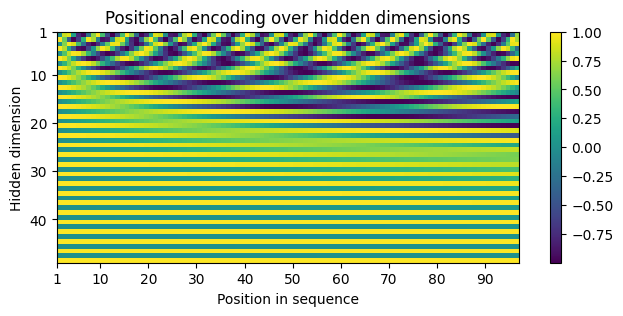

In [4]:
# Instantiate the Positional Encoding module with specific parameters
encod_block = PositionalEncoding(embed_size=48, max_len=96)
pe = encod_block.pe.squeeze().cpu().numpy().T

# Plotting the Positional Encoding with a different color map
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
pos = ax.imshow(pe, cmap="viridis", extent=(1, pe.shape[1] + 1, pe.shape[0] + 1, 1))
fig.colorbar(pos, ax=ax)
ax.set_xlabel("Position in sequence")
ax.set_ylabel("Hidden dimension")
ax.set_title("Positional encoding over hidden dimensions")
ax.set_xticks([1] + [i * 10 for i in range(1, 1 + pe.shape[1] // 10)])
ax.set_yticks([1] + [i * 10 for i in range(1, 1 + pe.shape[0] // 10)])
plt.show()

<font color="darkslateblue" size=+2.5><b>Self-Attention Mechanism</b></font>

In the context of the "Attention is All You Need" paper, the self-attention mechanism, also known as scaled dot-product attention we can call it the heart of the Transformer allows the model to weigh different words in a sentence differently, allowing it to focus more on relevant words for each position. It's like having a spotlight that focuses on different parts of a sentence, allowing the model to capturing dependencies and relationships between words in a sequence. This new way is quite different from older methods traditional sequence models like Recurrent Neural Networks (RNNs), which process data sequentially and have limitations in capturing long-range dependencies.

The scaled dot-product attention involves three key steps: calculating the query, key, and value vectors for each word in the input sequence. These vectors are then used to compute attention scores, determining the importance of different words in relation to a given word. The attention scores are normalized and used to weight the values, which are finally summed to produce the output of the attention mechanism. An illustration from the paper is shown in figure 7 below.

</div><div align="center">
  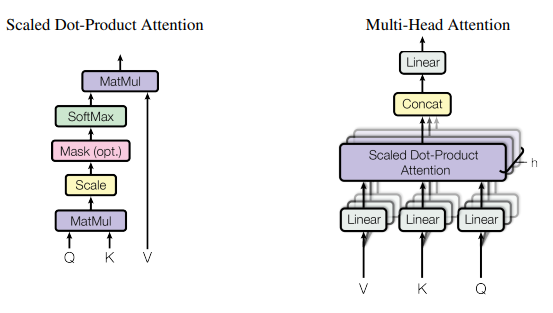
  <p style="text-align: center; font-weight: bold;">Figure 7: Scaled Dot-Product Attention and Multi-Head Attention</p>
</div>

The formulation for scaled dot-product attention can be summarized as follows:
Given a set of input sequences, denoted as Q (query), K (key), and V (value), Attention (attention scores) are computed as follows:

<div style="background-color: white; text-align: center;">
  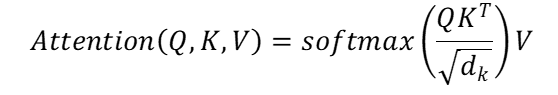
</div>

* Q, K, and V are the query, key, and value matrices, respectively.
* Square of dk is the dimensionality of the key vectors.
* The softmax function is applied row-wise to normalize the attention scores.
* The division by square of dk is a scaling factor that helps prevent the gradients from becoming too small during backpropagation.

To enhance the model's capability further, the concept of multi-head attention is introduced. Instead of relying on a single attention mechanism, multi-head attention involves using multiple parallel self-attention mechanisms, each referred to as a "head" to capture different types of relationships within the data. The outputs from these heads are concatenated and linearly transformed to generate the final multi-head attention output. This approach allows the model to attend to various aspects of the input sequence, enhancing its ability to understand context and relationships. 

In the multi-head attention formulation, the process is applied h times in parallel, each with its own learned linear projection matrices:

<div style="background-color: white; text-align: center;">
  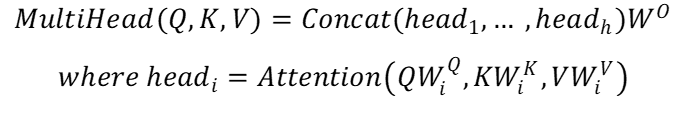
</div>

* Concat(…) denotes the concatenation of the outputs from each head.
* WO is a learned linear projection matrix applied to the concatenated outputs.

This multi-head attention mechanism enables the model to attend to different parts of the input sequence in parallel, capturing diverse patterns and relationships within the data. Here is the implementation of the Multi-Head Attention in the code provide below:

In [5]:
class MultiHeadAttention(nn.Module):
    """
    Multi-head attention mechanism for transformer models.

    Multi-head attention allows the model to focus on different parts of the input
    sequence independently by splitting the embedding into multiple heads running in parallel.

    Args:
        embed_size (int): The dimensionality of the input embeddings.
        num_heads (int): The number of attention heads.

    Attributes:
        embed_size (int): The dimensionality of the input embeddings.
        num_heads (int): The number of attention heads.
        head_dim (int): The dimensionality of each attention head.
        query_projection (nn.Linear): Linear layer for projecting queries.
        key_projection (nn.Linear): Linear layer for projecting keys.
        value_projection (nn.Linear): Linear layer for projecting values.
        output_projection (nn.Linear): Linear layer for projecting concatenated attention outputs.

    """

    def __init__(self, embed_size=512, num_heads=8):
        
        """
        Initializes the MultiHeadAttention module.

        Args:
            embed_size (int): The dimensionality of the input embeddings, Default to 512.
            num_heads (int): The number of attention heads, Default to 8.
        """
        
        super(MultiHeadAttention, self).__init__()
        assert embed_size % num_heads == 0, "Embedding size must be divisible by number of heads"
        self.embed_size = embed_size # 512 by default
        self.num_heads = num_heads # 8 by default
        self.head_dim = int(embed_size / num_heads) # 512/8 = 64 by default
        
        # Linear transformations for queries, keys, and values
        self.query_projection = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.key_projection = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.value_projection = nn.Linear(self.head_dim, self.head_dim, bias=False)
        
        # Linear transformation for output projection (8*64)x512 or 512x512 
        self.output_projection = nn.Linear(num_heads * self.head_dim, embed_size)
        
    def forward(self, values, keys, queries, mask=None):
        """
        Forward pass of the MultiHeadAttention module.

        Args:
            values (torch.Tensor): Input tensor of values, shape `(seq_length, batch_size, embed_size)`.
            keys (torch.Tensor): Input tensor of keys, shape `(seq_length, batch_size, embed_size)`.
            queries (torch.Tensor): Input tensor of queries, shape `(seq_length, batch_size, embed_size)`.
            mask (torch.Tensor, optional): Optional tensor with mask values, indicating elements to mask
                in the attention computation. Defaults to None.

        Returns:
            torch.Tensor: Output tensor after applying multi-head attention, shape `(seq_length, batch_size, embed_size)`.
        """
        
        # Extracting dimensions from the input tensors
        # N: Batch size or Number of sequences in the batch
        # value_len: Length of the sequence in the 'values' tensor
        # key_len: Length of the sequence in the 'keys' tensor
        # query_len: Length of the sequence in the 'queries' tensor
        # Input Size Format: (Batch Size, Sequence Length, Embedding Dimensions)
        N, value_len, key_len, query_len = query.shape[0], values.shape[1], keys.shape[1], query.shape[1]
        
        # Split the embedding into 'num_heads' pieces
        # Reshape the input tensors to enable multi-head attention
        # From: (Batch Size, Sequence Length, Embedding Dimensions)
        # To: (Batch Size, Sequence Length, num_heads, head_dim)
        # Example: Reshape (32x10x512) to (32x10x8x64)
        values = values.reshape(N, value_len, self.num_heads, self.head_dim)
        keys = keys.reshape(N, key_len, self.num_heads, self.head_dim)
        queries = query.reshape(N, query_len, self.num_heads, self.head_dim)
        
        # Linear projection for values, keys, and queries
        values = self.value_projection(values)
        keys = self.key_projection(keys)
        queries = self.query_projection(queries)
        
        # Transpose keys for efficient matrix multiplication
        keys_transpose = keys.transpose(-2, -1)
        
        # Scaled Dot-Product Attention
        scaled_scores = torch.matmul(queries, keys_transpose)
        
        # Masking
        if mask is not None:
            scaled_scores = scaled_scores.masked_fill(mask == 0, float("-1e20"))
        
        # Scale scores and apply softmax to obtain attention weights
        scaled_scores = scaled_scores * (1.0 / math.sqrt(self.head_dim))
        attention_weights = F.softmax(scaled_scores, dim=-1)

        # Weighted sum of values based on attention weights
        attention_output = torch.matmul(attention_weights, values)
        attention_output = attention_output.transpose(1, 2).contiguous().view(batch_size, seq_length, self.single_head_dim * self.num_heads)

        # Final output projection
        output = self.output_projection(attention_output)
        return output

The `MultiHeadAttention` class is designed to let the model pay attention to different segments of the input data at the same time. This is done using a technique called multi-head attention, which essentially breaks the input into several pieces and processes them separately but simultaneously. When you set up this class, you tell it the size of the input data (`embed_size`) and how many separate attention "heads" you want to use (`num_heads`).

Here's how it works in simple terms: Imagine you're trying to understand a sentence, and instead of focusing on the entire sentence at once, you break it down into parts. You look at the beginning, middle, and end separately to understand the whole sentence better. That's similar to what multi-head attention does with data.

In the setup stage, the class sets up some special functions (we call these linear transformations) that tweak the data slightly for each part of the process. These include separate tweaks for queries, keys, values, and finally, a special tweak to put all the information back together at the end.

When the data passes through the model's `forward` function, here's what happens in a straightforward way: The model first organizes the input to handle each "attention head" on its own. This means it's setting up to look at different parts of the information separately but at the same time. Then, it makes some adjustments (the ones we mentioned earlier) to the parts of the data called queries, keys, and values.

Next, the model decides which parts of the information should be focused on by using something called "scaled dot-product attention." This basically means it multiplies the queries (questions it wants answers to) by the keys (clues to the answers), but the keys are flipped. This multiplication helps the model figure out attention scores, which tell it where to focus its attention across the input data. At this point, there's also a step where it can choose to ignore some data deliberately—this is called "masking."

After it has these attention scores, the model makes them more manageable by scaling them down. It does this by dividing the scores by the square root of the size of each attention head, which keeps things balanced or helps stabilize the scores. Next, it uses a process called softmax on these scaled scores, turning them into attention weights. These weights are like indicators showing where the model's focus, or attention, should go. Once the model knows where to focus, it uses these attention weights to pick out and combine the important parts of the values (the actual content it’s focusing on).

Finally, it stitches this focused information then it puts everything back together into one piece of data that has been richer and more informative because it now contains insights gathered from paying close attention to specific parts of the input.


<font color="darkslateblue" size=+2.5><b>Feed Forward Network</b></font>

The `FeedForwardNetwork` in a transformer model plays a key role by injecting non-linearity and enabling the model to detect complex patterns in the input data. This section provides a detailed breakdown of its structure and functionality.

### Purpose and Position
1. **Non-linearity and Complexity:** By introducing non-linear operations, the Feed-Forward Network allows the model to understand more complicated relationships within the data, something linear operations alone can't achieve.
2. **Position-wise Processing:** It treats each input position independently, allowing the network to focus on specific features and patterns at different positions in the input sequence.

### Structure and Architecture
1. **Two Linear Layers:** The network comprises two linear (or fully-connected) layers - `fc1` for the initial linear transformation and `fc2` for the final linear transformation. The first layer expands input into higher-dimensional space, potentially making it easier to learn complex patterns. The second layer then scales it back, aligning the output with the transformer model's expected size.
2. **GELU Activation:** The GELU (Gaussian Error Linear Unit) activation function is applied after the first linear transformation (`fc1`), introducing non-linearity and facilitating the modeling of complex relationships.
3. **Dropout for Regularization:** A dropout layer is included after the activation function to prevent overfitting. This layer randomly drops a specified percentage of neuron activations during training, promoting better generalization.

### Initialization
1. **Xavier Initialization:** The weights of the linear layers (`fc1` and `fc2`) are initialized using Xavier (Glorot) initialization. This approach helps ensure that the network starts with weights that neither too large nor too small, avoiding the problems of gradients disappearing or exploding, which can halt learning.

When data flows through this network during the model's forward pass:

1. It first passes through the initial linear layer, transforming it based on learned patterns.
2. The GELU activation function then tweaks these transformed features, introducing complexity by bending and shaping them in non-linear ways.
3. The dropout layer comes into play, randomly deactivating some of these features to make the network's predictions not rely too heavily on any small set of neurons.
4. Finally, the second linear layer condenses these features back to the original embedding size, ready to be passed on to the next part of the transformer model.


In [6]:
class FeedForwardNetwork(nn.Module):
    """
    Feed-forward neural network component of the transformer model.

    The feed-forward network consists of two linear layers with a GELU activation
    function and dropout applied between them.

    Args:
        embed_size (int): The dimensionality of the input embeddings.
        ff_hidden_size (int): The size of the hidden layer in the feed-forward network.
        dropout_rate (float): Dropout rate for regularization.

    Attributes:
        fc1 (nn.Linear): The first linear layer for the initial linear transformation.
        fc2 (nn.Linear): The second linear layer for the final linear transformation.
        dropout (nn.Dropout): Dropout layer for regularization.
    """

    def __init__(self, embed_size, ff_hidden_size, dropout_rate=0.1):
        """
        Initializes the FeedForwardNetwork module.

        Args:
            embed_size (int): The dimensionality of the input embeddings.
            ff_hidden_size (int): The size of the hidden layer in the feed-forward network.
            dropout_rate (float): Dropout rate for regularization. Defaults to 0.1.
        """
            
        super(FeedForwardNetwork, self).__init__()
        # First linear layer with GELU activation
        self.fc1 = nn.Linear(embed_size, ff_hidden_size)
        # Second linear layer for the final transformation
        self.fc2 = nn.Linear(ff_hidden_size, embed_size)
        # Dropout layer for regularization
        self.dropout = nn.Dropout(dropout_rate)
        
        # Initialize weights using Xavier initialization
        self._init_weights()

    def _init_weights(self):
        """
        Initializes the weights of the linear layers using Xavier initialization.
            
        """
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.constant_(self.fc1.bias, 0)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.constant_(self.fc2.bias, 0)

    def forward(self, x):
        """
        Forward pass of the FeedForwardNetwork module.

        Args:
            x (torch.Tensor): The input tensor of shape `(seq_len, batch_size, embed_size)`.

        Returns:
            torch.Tensor: The tensor after applying the feed-forward network, of shape `(seq_len, batch_size, embed_size)`.
        """
        # Initialize linear transformation with GELU activation
        x = F.gelu(self.fc1(x))
        # Dropout regularization
        x = self.dropout(x)
        # Final linear transformation
        x = self.fc2(x)
        return x

<font color="darkslateblue" size=+2.5><b>Initialization of Weights with Xavier (Glorot) and Layer Normalization Constants</b></font>

In this section, we focus on the initialization of weights using the Xavier (Glorot) method for linear layers and setting constants for layer normalization. This process is key to making sure our model learns effectively and remains stable as it trains.

In [7]:
# Define the _init_weights function
def _init_weights(module):
    """
    Initialize weights for a module using Xavier (Glorot) initialization
    for linear layers and set constants for layer normalization.

    Args:
        module (nn.Module): The module for weight initialization.
    """
        
    if isinstance(module, nn.Linear):
        # Xavier (Glorot) initialization for linear layers
        nn.init.xavier_uniform_(module.weight)
        if module.bias is not None:
            # Initialization bias with the constant value of 0
            nn.init.constant_(module.bias, 0)
    elif isinstance(module, nn.LayerNorm):
        # Initialization layer normalization bias with the constant value of 0
        nn.init.constant_(module.bias, 0)
        # Initialization layer normalization weight with the constant value of 1
        nn.init.constant_(module.weight, 1.0)

Let's dive into the `_init_weights` function, This function takes a closer look at each part of the model (we call these parts "modules") and decides how to set them up before training starts.

For any module that's a linear layer (think of these as the basic building blocks for processing data in the network), we use something called the Xavier (Glorot) initialization method. This method sets up the weights (the parameters that get adjusted during training) in a way that's supposed to keep the data flowing smoothly through the network, preventing issues where the data becomes too squished or too spread out (scientists call these problems vanishing and exploding gradients).

If the linear layer has a bias (an extra parameter that helps with learning), we start it off at 0. This is like setting the baseline expectation for the model before it starts learning from the data.

Then, if we come across a module for layer normalization (a technique to help every input to a layer have a similar distribution), we set its bias to 0 and its weights to 1. This doesn't really change the data at first but gives the model a neutral, standard starting point for controlling how varied the data is as it moves from layer to layer.


<font color="darkslateblue" size=+2.5><b>Transformer Block</b></font>

**TransformerBlock** is a fundamental component of the Transformer model, which was introduced in the paper "Attention is All You Need". A Transformer model is mainly composed of these blocks stacked on top of each other. Each block can be thought of as one layer in the network, encapsulating several key operations that are central to the Transformer's architecture including Multi-head self-attention mechanism, Position-wise feed-forward network, Layer normalization, Dropout for regularization. It is designed to process an input sequence (such as a sentence in NLP tasks) by applying self-attention, followed by normalization and a feed-forward network, to enhance the representation of each element in the sequence.


In [8]:
class TransformerBlock(nn.Module):
    """
    Transformer block, a fundamental component of the transformer model.

    A transformer block consists of multi-head self-attention, layer normalization,
    and a feed-forward neural network with dropout.

    Args:
        embed_dim (int): The dimensionality of the input embeddings.
        ff_hidden_size (int): The size of the hidden layer in the feed-forward network.
        num_heads (int): The number of attention heads in the multi-head attention mechanism. Defaults to 8.
        dropout_rate (float): Dropout rate for regularization. Defaults to 0.2.

    Attributes:
        attention (MultiHeadAttention): Multi-head self-attention module.
        norm1 (nn.LayerNorm): Layer normalization for the first layer.
        norm2 (nn.LayerNorm): Layer normalization for the second layer.
        feed_forward (FeedForwardNetwork): Feed-forward neural network module.
        dropout1 (nn.Dropout): Dropout layer for the first layer.
        dropout2 (nn.Dropout): Dropout layer for the second layer.
    """
        
    def __init__(self, embed_dim, ff_hidden_size, num_heads=8, dropout_rate=0.2):
        """
        Initializes the TransformerBlock module.

        Args:
            embed_dim (int): The dimensionality of the input embeddings.
            ff_hidden_size (int): The size of the hidden layer in the feed-forward network.
            num_heads (int): The number of attention heads in the multi-head attention mechanism. Defaults to 8.
            dropout_rate (float): Dropout rate for regularization. Defaults to 0.2.
        """
            
        super(TransformerBlock, self).__init__()
        # Multi-head self-attention mechanism
        self.attention = MultiHeadAttention(embed_dim, num_heads)
        # Layer normalization for the first layer
        self.norm1 = nn.LayerNorm(embed_dim)
        # Layer normalization for the second layer
        self.norm2 = nn.LayerNorm(embed_dim)

        # Using the improved FeedForwardNetwork
        self.feed_forward = FeedForwardNetwork(embed_dim, ff_hidden_size, dropout_rate)

         # Dropout layers for regularization
        self.dropout1 = nn.Dropout(dropout_rate)
        self.dropout2 = nn.Dropout(dropout_rate)

        # Initialize weights
        self.apply(_init_weights)
    
    def forward(self, value, key, query):
        """
        Forward pass of the TransformerBlock module.

        Args:
            value (torch.Tensor): The input tensor of values, of shape `(seq_len, batch_size, embed_dim)`.
            key (torch.Tensor): The input tensor of keys, of shape `(seq_len, batch_size, embed_dim)`.
            query (torch.Tensor): The input tensor of queries, of shape `(seq_len, batch_size, embed_dim)`.

        Returns:
            torch.Tensor: The tensor after applying the transformer block, of shape `(seq_len, batch_size, embed_dim)`.
        """
        # Layer normalization for the first layer
        norm_query = self.norm1(query)
        # Multi-head self-attention mechanism
        attention_out = self.attention(value, key, norm_query)
        # Skip connection and dropout for the first layer
        query = query + self.dropout1(attention_out) # Residual connection
        # Layer normalization for the second layer
        norm_query = self.norm2(query)
        # Feed-forward neural network
        feed_fwd_out = self.feed_forward(norm_query)
        # Skip connection and dropout for the second layer
        query = query + self.dropout2(feed_fwd_out) # Residual connection
        
        return query

Let's break down the component **Transformer Block** and the functionality of the classes below:

#### Multi-Head Self-Attention (`attention`):
This module computes attention scores for each element in the input sequence with respect to all other elements. It allows the model to focus on different parts of the sequence for each element. The multi-head aspect means this process happens in parallel across multiple 'heads', enabling the model to capture various aspects of the context simultaneously.

#### Layer Normalization (`norm1` and `norm2`):
Normalization steps are applied before the attention mechanism and the feed-forward network. Layer normalization helps in stabilizing the learning process by normalizing the inputs across the features for each layer.

#### Feed-Forward Neural Network (`feed_forward`):
After attention and normalization, the data is passed through a feed-forward neural network. This network applies further transformations to the data, allowing for additional complexity and depth in the model's understanding of the sequence.

#### Dropout (`dropout1` and `dropout2`):
Dropout is a regularization technique to prevent overfitting. By randomly setting a fraction of the input units to 0 at each update during training, it helps improve the model's generalization.

During initialization, the Transformer Block configures its components based on the provided arguments:

- **embed_dim**: The size of the input and output dimensionality, which is crucial for the multi-head attention and the positional feed-forward network.
- **ff_hidden_size**: The size of the hidden layer within the feed-forward network, dictating the network's capacity.
- **num_heads**: Determines how many parallel attention heads are used.
- **dropout_rate**: The rate at which inputs are randomly set to zero during training to prevent overfitting.

The `forward` method defines how data flows through the Transformer block:

1. **Layer Normalization 1**: The input query is first normalized.
2. **Multi-Head Self-Attention**: The normalized query, along with the key and value tensors, are passed through the multi-head self-attention mechanism. This step allows each element in the sequence to attend to others based on the learned attention scores.
3. **Skip Connection and Dropout 1**: The output of the attention mechanism is added back to the original query tensor (residual connection) and then passed through a dropout layer.
4. **Layer Normalization 2**: The result is again normalized.
5. **Feed-Forward Network**: This normalized output is then processed through the feed-forward network.
6. **Skip Connection and Dropout 2**: Finally, the output of the feed-forward network is added back to the query (another residual connection) and passed through another dropout layer.

The Transformer block outputs a tensor that has been transformed by attention, normalization, and feed-forward layers, maintaining the original input shape (`seq_len`, `batch_size`, `embed_dim`). This output can be fed into subsequent Transformer blocks or used as is for further processing, depending on the architecture's design.


<font color="darkslateblue" size=+2.5><b>Transformer Encoder</b></font>

The `TransformerEncoder` serves as the encoding component of a Transformer model. It is responsible for processing the input sequence through multiple layers of `TransformerBlock` to produce a set of output vectors that represent the input sequence in a high-dimensional space.

In [9]:
class TransformerEncoder(nn.Module):
    """
    Transformer Encoder module for processing sequential data.

    Args:
        seq_len (int): Length of the input sequence.
        vocab_size (int): Size of the vocabulary.
        embed_dim (int): Dimension of the embedding.
        num_layers (int): Number of encoder layers. Defaults to 2.
        ff_hidden_size (int): Size of the hidden layer in the feed-forward network. Defaults to 2048.
        num_heads (int): Number of heads in multi-head attention. Defaults to 8.

    Returns:
        out (torch.Tensor): Output of the encoder.
    """
    def __init__(self, seq_len, vocab_size, embed_dim, num_layers=2, ff_hidden_size=2048, num_heads=8):
        super(TransformerEncoder, self).__init__()
        
        # Embedding layer to convert input indices to dense vectors
        self.embedding_layer = Embedding(vocab_size, embed_dim)
        # Positional encoding to provide positional information to the model
        self.positional_encoder = PositionalEncoding(seq_len, embed_dim)
        # Stack multiple Transformer blocks as encoder layers
        self.layers = nn.ModuleList([TransformerBlock(embed_dim, ff_hidden_size, num_heads) for i in range(num_layers)])
    
    def forward(self, x):
        # Embedding layer converts input indices to dense vectors
        embed_out = self.embedding_layer(x)
        # Add positional encoding to the embedded sequence
        out = self.positional_encoder(embed_out)
        # Pass the sequence through multiple Transformer blocks
        for layer in self.layers:
            out = layer(out, out, out)

        return out  #32x10x512

Let's break down the components and functionality of the `TransformerEncoder` class:
* **Embedding Layer (`embedding_layer`)**: Converts input indices (which represent tokens or words in the vocabulary) into dense vector embeddings of a specified dimension (`embed_dim`). This transformation is crucial for processing text data in neural networks, as it allows for the representation of words in a continuous vector space, facilitating the learning of semantic relationships.

* **Positional Encoding (`positional_encoder`)**: Since the Transformer architecture does not inherently process sequences in order (unlike RNNs or LSTMs), positional encodings are added to the embeddings to provide information about the position of each token in the sequence. This ensures that the model can recognize the order of tokens, which is essential for understanding the meaning of sequences.

* **Transformer Blocks (`layers`)**: A series of Transformer blocks (as defined by the `TransformerBlock` class) are stacked to form the encoder. Each Transformer block applies self-attention, followed by normalization and a feed-forward network, processing the input sequence iteratively. The number of blocks is defined by `num_layers`, allowing for a customizable depth of the encoder.

During initialization, the `TransformerEncoder` configures its components based on the provided arguments:

* **seq_len**: The expected length of input sequences.
* **vocab_size**: The total number of unique tokens or words in the vocabulary.
* **embed_dim**: The dimensionality of the word embeddings.
* **num_layers**: The number of Transformer blocks to stack in the encoder.
* **ff_hidden_size**: The size of the hidden layer in the feed-forward networks within each Transformer block.
* **num_heads**: The number of heads in the multi-head attention mechanism in each Transformer block.

The `forward` method defines the data flow through the Transformer encoder:

* **Embedding**: The input sequence `x` (a tensor of token indices) is passed through the embedding layer to obtain dense vector representations of each token.
* Positional Encoding: Positional information is added to the embedded vectors to retain the sequence's order.
* **Transformer Blocks**: The sequence, now enhanced with positional encodings, is processed by each Transformer block in the layers stack. Each block applies its self-attention, normalization, and feed-forward mechanisms, with the output of one block serving as the input to the next.

The final output is a tensor of shape `(batch_size, seq_len, embed_dim)`, where `batch_size` is the number of sequences processed in parallel (not explicitly mentioned but implied by the operation), `seq_len` is the length of the input sequences, and `embed_dim` is the dimensionality of the embeddings. This output tensor contains the transformed representations of the input sequences, ready for further processing or decoding in a Transformer-based model.
```

<font color="darkslateblue" size=+2.5><b>Decoder Block</b></font>

The `DecoderBlock` is a fundamental unit within the Transformer Decoder architecture, designed to process target sequences for tasks such as translation, text generation, and more. It incorporates multi-head attention mechanisms, layer normalization, and a feed-forward network, arranged to handle dependencies and relationships within the input data effectively.

In [10]:
class DecoderBlock(nn.Module):
    """
    Decoder Block module for processing target sequences in the Transformer Decoder.

    Args:
        embed_dim (int): Dimension of the embedding.
        ff_hidden_size (int): Size of the hidden layer in the feed-forward network.
        num_heads (int): Number of heads in multi-head attention. Defaults to 8.
        dropout_rate (float): Dropout rate for regularization. Defaults to 0.2.

    Returns:
        out (torch.Tensor): Output tensor representing processed target sequences.
    """
    def __init__(self, embed_dim, ff_hidden_size, num_heads=8, dropout_rate=0.2):
        super(DecoderBlock, self).__init__()
        # Multi-head attention layer for attending to different parts of the sequence
        self.attention = MultiHeadAttention(embed_dim, num_heads)
        
        # Layer normalization for stabilizing and accelerating the training process
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)

        # TransformerBlock now correctly receives ff_hidden_size
        self.transformer_block = TransformerBlock(embed_dim, ff_hidden_size, num_heads, dropout_rate)
    
        # Dropout layer for regularization
        self.dropout = nn.Dropout(dropout_rate)
        
        # Initialize weights using Xavier/Glorot initialization
        self.apply(_init_weights)
    
    def forward(self, key, query, value, mask):
        """
        Forward pass of the DecoderBlock module.

        Args:
            key (torch.Tensor): Key tensor for attention mechanism.
            query (torch.Tensor): Query tensor for attention mechanism.
            value (torch.Tensor): Value tensor for attention mechanism.
            mask (torch.Tensor): Mask for attention mechanism.

        Returns:
            out (torch.Tensor): Output tensor representing processed target sequences.
        """
        # Apply layer normalization to the query tensor
        norm_query = self.norm1(query)
        # Multi-head attention mechanism to attend to different parts of the sequence
        attention = self.attention(value, value, norm_query, mask=mask)
        # Apply dropout for regularization and add the attention output to the original query
        query = query + self.dropout(attention)
        # Pass the processed tensors through the TransformerBlock
        out = self.transformer_block(key, query, value)
        
        return out # Output tensor representing processed target sequences

Let's break down the components and functionality of the `DecoderBlock` class:

### Multi-Head Attention (`attention`):
This component is pivotal for the decoder, enabling it to focus on relevant parts of the input sequence through self-attention. It's particularly adept at managing dependencies and capturing context within the sequence.

### Layer Normalization (`norm1`, `norm2`):
These normalization layers are crucial for stabilizing the neural network's learning process. By normalizing the input across features, they help in accelerating convergence and improving overall model performance.

### TransformerBlock (`transformer_block`):
This is a composite component that further encapsulates the functionality of multi-head attention and a feed-forward neural network, tailored to process the sequences in a manner that enhances the representation of the input data. It is a slight deviation from the traditional design, incorporating a Transformer block within a Decoder block, which suggests a layered approach to handling the complexity of sequence decoding.

### Dropout (`dropout`):
A dropout layer is included for regularization purposes. By randomly nullifying a portion of the inputs, it helps in preventing the model from overfitting, ensuring better generalization to unseen data.

During initialization, the `DecoderBlock` sets up its internal components based on the specified parameters:

- **embed_dim**: The size of the input embeddings and the dimensionality across which the multi-head attention and layer normalization operate.
- **ff_hidden_size**: Specifies the size of the hidden layer within the encapsulated Transformer block's feed-forward network.
- **num_heads**: Determines the division of attention mechanisms into multiple 'heads', enabling the model to concurrently attend to information from different representation subspaces at different positions.
- **dropout_rate**: Sets the probability with which elements are randomly dropped out to regularize the model.

An important aspect of the initialization is applying a specific weights initialization strategy (`_init_weights`), potentially using methods like Xavier or Glorot initialization, to ensure optimal starting weights for the model components.

### Forward Method:
The forward method defines how the block processes its inputs:

1. **Normalization**: Initially, the query tensor undergoes normalization (`norm1`), ensuring that the input to the attention mechanism is in a suitable state for processing.

2. **Attention with Masking**: The normalized query, along with the value and key tensors, is fed into the multi-head attention mechanism. A mask can be applied here, typically used in decoding to prevent the model from 'peeking' into the future tokens, maintaining the auto-regressive property of the decoder.

3. **Dropout and Addition**: The output from the attention layer is regularized using dropout, then added to the original query tensor in a residual connection, enhancing the flow of gradients during backpropagation and mitigating the risk of vanishing gradients.

4. **Transformer Block Processing**: The composite `transformer_block` further processes the data, integrating another level of attention and feed-forward networks, potentially to refine the representation and incorporate additional context.

### Output:
The module returns an output tensor that represents the processed target sequences. This output is shaped by the model's ability to attend to both the encoder's output and its own input in a manner that optimally captures the dependencies and contextual nuances needed for the decoding task.

This architecture highlights the flexibility and depth of processing afforded by the Transformer model, leveraging both repeated and hierarchical structures to process and generate sequence data effectively.

<font color="darkslateblue" size=+2.5><b>TransformerDecoder</b></font>

The `TransformerDecoder` class is a crucial component of the Transformer model, specifically designed for generating target sequences, such as in translation tasks or text generation. This module decodes the encoded information from the input sequence and progressively generates the output sequence.

In [11]:
class TransformerDecoder(nn.Module):
    """
    Transformer Decoder module for generating target sequences.

    Args:
        target_vocab_size (int): Vocabulary size of the target language.
        embed_dim (int): Dimension of the embedding.
        seq_len (int): Length of the input sequence.
        num_layers (int): Number of decoder layers. Defaults to 2.
        ff_hidden_size (int): Size of the hidden layer in the feed-forward network. Defaults to 2048.
        num_heads (int): Number of heads in multi-head attention. Defaults to 8.
        dropout_rate (float): Dropout rate for regularization. Defaults to 0.2.

    Returns:
        out (torch.Tensor): Output vector representing generated target sequences.
    """
    def __init__(self, target_vocab_size, embed_dim, seq_len, num_layers=2, ff_hidden_size=2048, num_heads=8, dropout_rate=0.2):
        super(TransformerDecoder, self).__init__()
        # Embedding layer to convert target indices to dense vectors
        self.word_embedding = nn.Embedding(target_vocab_size, embed_dim)
        # Positional encoding to provide positional information to the model
        self.position_embedding = PositionalEncoding(seq_len, embed_dim)
        # Stack multiple Decoder blocks as decoder layers
        self.layers = nn.ModuleList(
            [
                DecoderBlock(embed_dim, ff_hidden_size, num_heads, dropout_rate) 
                for _ in range(num_layers)
            ]
        )
        # Fully connected layer for generating output logits
        self.fc_out = nn.Linear(embed_dim, target_vocab_size)
        # Dropout layer for regularization
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x, enc_out, mask):
        """
        Forward pass of the TransformerDecoder module.

        Args:
            x (torch.Tensor): Input vector from the target language.
            enc_out (torch.Tensor): Output from the encoder layer.
            mask (torch.Tensor): Mask for decoder self-attention.

        Returns:
            out (torch.Tensor): Output vector representing generated target sequences.
        """
        # Embedding layer converts target indices to dense vectors
        x = self.word_embedding(x)  # Shape: (batch_size, seq_len, embed_dim)
        # Add positional encoding to the embedded sequence
        x = self.position_embedding(x) # Shape: (batch_size, seq_len, embed_dim)
        # Apply dropout for regularization
        x = self.dropout(x)
     
        # Pass the sequence through multiple Decoder blocks
        for layer in self.layers:
            x = layer(enc_out, x, enc_out, mask)
        
        # Generate output logits using a fully connected layer
        out = F.softmax(self.fc_out(x), dim=-1)

        return out # Shape: (batch_size, seq_len, target_vocab_size)

Let's delve into its structure and functionality:

### Word Embedding (`word_embedding`):
Converts tokens from the target sequence into dense vectors of a fixed size (`embed_dim`). This layer maps each token to a high-dimensional space where the model can more easily discern the relationships between different tokens.

### Positional Encoding (`position_embedding`):
Adds information about the position of each token within the sequence to the embeddings. Since the Transformer model does not inherently process sequential data in order (like RNNs or CNNs), positional encodings are crucial for maintaining the order of the sequence.

### Decoder Blocks (`layers`):
A series of `DecoderBlock` modules stacked together to form the decoder's core. Each `DecoderBlock` is responsible for processing the input (and encoded output) further, applying multi-head self-attention, and then processing through a feed-forward network. This structure allows the decoder to focus on relevant parts of the input sequence and the previously generated sequence simultaneously.

### Fully Connected Output Layer (`fc_out`):
This layer maps the decoder's high-dimensional representation back to the vocabulary space of the target language, producing logits that represent the probability distribution over the target vocabulary for each token position.

### Dropout (`dropout`):
Applied to the embeddings and potentially within each `DecoderBlock`, dropout is a regularization technique used to prevent overfitting by randomly setting a subset of the input units to zero during training.

### Initialization:
Upon initialization, the `TransformerDecoder` configures itself with the following parameters:

- `target_vocab_size`: The size of the target vocabulary, defining the number of unique tokens that the model can generate.
- `embed_dim`: The dimensionality of the token embeddings, a key factor in determining the model's capacity to represent and differentiate tokens.
- `seq_len`: The expected length of the input sequences, informing the positional encoding.
- `num_layers`: The number of `DecoderBlock` modules to stack, dictating the depth of the decoder.
- `ff_hidden_size`: The size of the hidden layer within the feed-forward network in each `DecoderBlock`.
- `num_heads`: The number of heads in the multi-head attention mechanism within each `DecoderBlock`.
- `dropout_rate`: The rate at which elements are dropped out during training, a measure to combat overfitting.

### Forward Pass:
During the forward pass, the decoder processes input sequences as follows:

1. **Embedding**: Input tokens are first converted into dense vector representations through the embedding layer.
2. **Positional Encoding**: These embeddings are then combined with positional encodings to maintain sequence order information.
3. **Dropout Application**: The combined embeddings undergo dropout for regularization.
4. **Decoding through Decoder Blocks**: The prepared embeddings are then passed sequentially through the stack of `DecoderBlock` modules. Each block processes the input in the context of the encoded output (`enc_out`) from the Transformer encoder and applies self-attention, allowing the decoder to focus on different parts of the input sequence and the encoder output.
5. **Output Generation**: Finally, the output from the last `DecoderBlock` is passed through a fully connected layer, and a softmax function is applied to produce a probability distribution over the target vocabulary for each position in the sequence.

The output of the `TransformerDecoder` is a tensor of shape `(batch_size, seq_len, target_vocab_size)`, where each element in the tensor represents the probability distribution over the target vocabulary for each token position in the sequence. This allows the model to generate target sequences one token at a time, guided by the encoded input and the sequence generated so far.


<font color="darkslateblue" size=+2.5><b>Transformer</b></font>

The Transformer model consists of two primary components: an **encoder** that processes the input sequence, and a **decoder** that generates the output sequence. Both parts are composed of multiple layers that perform complex transformations to understand the input data's context and generate coherent and contextually relevant outputs.


In [12]:
class Transformer(nn.Module):
    """
    Transformer model for sequence-to-sequence tasks.

    Args:
       embed_dim (int): Dimension of the embedding.
       src_vocab_size (int): Vocabulary size of the source language.
       target_vocab_size (int): Vocabulary size of the target language.
       seq_length (int): Length of input sequence.
       num_layers (int): Number of encoder and decoder layers. Defaults to 2.
       ff_hidden_size (int): Size of the hidden layer in the feed-forward network. Defaults to 2048.
       num_heads (int): Number of heads in multihead attention. Defaults to 8.

    Attributes:
        target_vocab_size (int): Vocabulary size of the target language.
        encoder (TransformerEncoder): Encoder module of the Transformer.
        decoder (TransformerDecoder): Decoder module of the Transformer.
    """
        
    def __init__(self, embed_dim, src_vocab_size, target_vocab_size, seq_length, num_layers=2, ff_hidden_size=2048, num_heads=8):
        super(Transformer, self).__init__()
        
        self.target_vocab_size = target_vocab_size
        
        # Initialize TransformerEncoder and TransformerDecoder
        self.encoder = TransformerEncoder(seq_length, src_vocab_size, embed_dim, num_layers=num_layers, ff_hidden_size=ff_hidden_size, num_heads=num_heads)
        self.decoder = TransformerDecoder(target_vocab_size, embed_dim, seq_length, num_layers=num_layers, ff_hidden_size=ff_hidden_size, num_heads=num_heads)
    
    
    def make_trg_mask(self, trg):
        """
        Create a target mask for attention mechanism.

        Args:
            trg (torch.Tensor): Target sequence.

        Returns:
            trg_mask (torch.Tensor): Target mask.
        """
        batch_size, trg_len = trg.shape
        # returns the lower triangular part of matrix filled with ones
        trg_mask = torch.tril(torch.ones((trg_len, trg_len))).expand(
            batch_size, 1, trg_len, trg_len
        )
        return trg_mask    

    def decode(self,src,trg):
        """
        Inference step to generate predictions for the target sequence.

        Args:
            src (torch.Tensor): Input to the encoder.
            trg (torch.Tensor): Input to the decoder.

        Returns:
            out_labels (list): List of predicted labels for the target sequence.
        """
        trg_mask = self.make_trg_mask(trg)
        enc_out = self.encoder(src)
        out_labels = []
        batch_size,seq_len = src.shape[0],src.shape[1]
        #outputs = torch.zeros(seq_len, batch_size, self.target_vocab_size)
        out = trg
        for i in range(seq_len): #10
            out = self.decoder(out,enc_out,trg_mask) #bs x seq_len x vocab_dim
            # taking the last token
            out = out[:,-1,:]
     
            out = out.argmax(-1)
            out_labels.append(out.item())
            out = torch.unsqueeze(out,axis=0)
          
        
        return out_labels
    
    def forward(self, src, trg):
        """
        Forward pass of the Transformer model.

        Args:
            src (torch.Tensor): Input to the encoder.
            trg (torch.Tensor): Input to the decoder.

        Returns:
            outputs (torch.Tensor): Final vector representing probabilities of each target word.
        """
        trg_mask = self.make_trg_mask(trg)
        enc_out = self.encoder(src)
   
        outputs = self.decoder(trg, enc_out, trg_mask)
        return outputs

## Encoder (`encoder`)

The `TransformerEncoder` module processes the input sequence. It first converts tokens into embeddings, adds positional encodings to retain order information, and then passes these through multiple encoder layers. Each layer uses self-attention to process the sequence in parallel, capturing the contextual relationships between words regardless of their position in the sentence.

## Decoder (`decoder`)

The `TransformerDecoder` module generates the target sequence based on the encoded input and its own previous outputs. It also uses embeddings and positional encodings, and its layers incorporate an additional attention mechanism to focus on relevant parts of the input sequence as determined by the encoder. This mechanism allows the decoder to consider the entire input sequence when generating each word of the output sequence.

### Initialization

Upon initialization, the Transformer model sets up its encoder and decoder components with the specified configurations:

- `embed_dim`: The size of the embeddings used for both input and output tokens.
- `src_vocab_size` and `target_vocab_size`: The sizes of the source and target vocabularies, respectively, which determine the dimensions of the embedding layers in the encoder and decoder.
- `seq_length`: The expected length of input sequences, which informs the size of positional encodings.
- `num_layers`: The number of layers in both the encoder and decoder.
- `ff_hidden_size`: The dimensionality of the feed-forward network within each layer.
- `num_heads`: The number of attention heads in the multi-head attention mechanisms.

### Auxiliary Methods

- `make_trg_mask`: Generates a mask for the target sequence to prevent the decoder from attending to future tokens. This triangular mask allows the model to maintain the auto-regressive property, where the prediction for each token can only depend on previously generated tokens.

### Decoding and Inference

- `decode`: An inference method to generate predictions for the target sequence given an input sequence. It iteratively predicts each token of the output sequence, using the previously predicted tokens as part of the input for the next prediction. This method demonstrates how the model can be applied in a step-by-step prediction process, which is typical in sequence generation tasks.

### Forward Pass

- `forward`: Defines the forward pass of the model for training. It takes an input sequence (`src`) and a target sequence (`trg`), processes the input through the encoder, and then processes the target sequence through the decoder in the context of the encoded input. A mask is applied to the target sequence to ensure proper auto-regressive behavior in the decoder. The output is a tensor representing the probability distribution over the target vocabulary for each token in the target sequence, which can be used to calculate the loss for model training.

## Summary

The Transformer model is a comprehensive framework for handling sequence-to-sequence tasks, leveraging the power of self-attention to efficiently process sequences in parallel while capturing complex dependencies. This model architecture is highly influential, serving as the foundation for numerous advancements in natural language processing and beyond.


<font color="darkslateblue" size=+2.5><b>Test Code</b></font>

# Transformer Model Setup for Sequence-to-Sequence Task

This code snippet demonstrates the setup and instantiation of a Transformer model for a sequence-to-sequence task, with sample input sequences provided for context. Let's break down the key components and steps outlined in the code:

## Hyperparameters Setup

First, the code defines a set of hyperparameters for the Transformer model. These parameters control various aspects of the model's architecture and its capacity to learn from data:

- `src_vocab_size`, `target_vocab_size`: The sizes of the source and target vocabularies, respectively. These define the range of tokens that the model can process and generate. Here, both are set to 11, implying the model can handle 11 distinct tokens for both input and output sequences.

- `num_layers`: The number of layers in both the encoder and decoder parts of the Transformer model. Set to 6, this implies a relatively deep model, allowing for complex representations.

- `seq_length`: The fixed length of input and target sequences the model expects. In this case, 12 tokens per sequence.

- `embed_dim`: The size of the embeddings used to represent tokens, set to 512. This is a critical parameter as it defines the dimensionality of the model's internal representation space.

- `ff_hidden_size`: The size of the hidden layer in the feed-forward network within each Transformer block, set to 2048. This parameter controls the capacity of these feed-forward networks.

- `num_heads`: The number of heads in the multi-head attention mechanism, set to 8. Multiple heads allow the model to simultaneously attend to different parts of the sequence from different representation subspaces.


In [13]:
# Set hyperparameters
src_vocab_size = 11
target_vocab_size = 11
num_layers = 6
seq_length = 12
embed_dim = 512
ff_hidden_size = 2048  # Feed-forward hidden layer size
num_heads = 8

# Define sample input sequences
src_sequence = torch.tensor([[0, 2, 5, 6, 4, 3, 9, 5, 2, 9, 10, 1], 
                             [0, 2, 8, 7, 3, 4, 5, 6, 7, 2, 10, 1]])
target_sequence = torch.tensor([[0, 1, 7, 4, 3, 5, 9, 2, 8, 10, 9, 1], 
                                [0, 1, 5, 6, 2, 4, 7, 6, 2, 8, 10, 1]])
# Print the shape of input sequences
print("Shape of source sequence:", src_sequence.shape)
print("Shape of target sequence:", target_sequence.shape)

# Instantiate the Transformer model with the specified parameters
model = Transformer(embed_dim=embed_dim, src_vocab_size=src_vocab_size, 
                    target_vocab_size=target_vocab_size, seq_length=seq_length,
                    num_layers=num_layers, ff_hidden_size=ff_hidden_size, num_heads=num_heads)

# Print the model architecture
print("Transformer Model:")
print(model)

Shape of source sequence: torch.Size([2, 12])
Shape of target sequence: torch.Size([2, 12])
Transformer Model:
Transformer(
  (encoder): TransformerEncoder(
    (embedding_layer): Embedding(
      (embedding): Embedding(11, 512)
    )
    (positional_encoder): PositionalEncoding()
    (layers): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadAttention(
          (query_projection): Linear(in_features=64, out_features=64, bias=False)
          (key_projection): Linear(in_features=64, out_features=64, bias=False)
          (value_projection): Linear(in_features=64, out_features=64, bias=False)
          (output_projection): Linear(in_features=512, out_features=512, bias=True)
        )
        (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (feed_forward): FeedForwardNetwork(
          (fc1): Linear(in_features=512, out_features=2048, bias=True)
          (fc2): Line

# Sample Input Sequences

The code then defines sample input sequences for both the source and target languages, encoded as tensors. Each tensor contains two sequences (batch size of 2) with a fixed length of 12 tokens. These sequences are meant to simulate a batch of input-output pairs for a sequence-to-sequence task, like machine translation.

## Model Instantiation

With the hyperparameters defined, the code instantiates a Transformer model by passing these parameters to its constructor. This creates a Transformer model configured to process sequences of length 12, with specific sizes for the source and target vocabularies, embedding dimensions, and internal architectures.

## Output

The shapes of the source and target sequences are printed, confirming they are both of shape (2, 12), indicating a batch size of 2 and a sequence length of 12. Following this, the model's architecture is printed, showcasing its configuration including the encoder and decoder components, their layers, and other settings as determined by the specified hyperparameters.

This snippet effectively demonstrates how to configure and instantiate a Transformer model for sequence-to-sequence tasks, preparing it for training or inference with specified input sequences.
